In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.5.0


In [ ]:
# %pip install tensorflow


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

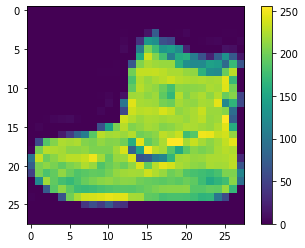

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0


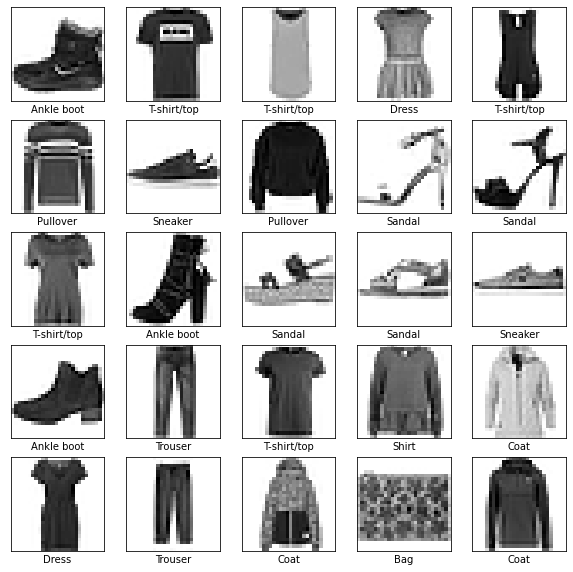

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [18]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4999 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3790 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3404 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3156 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2973 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2819 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2701 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2579 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2501 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3303 - accuracy: 0.8825

Test accuracy: 0.8824999928474426


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [21]:
predictions = probability_model.predict(test_images)


In [22]:
predictions[0]


array([7.3196018e-09, 1.0834665e-04, 4.1598600e-08, 2.1237430e-10,
       8.7765763e-08, 2.4243390e-02, 1.2110750e-07, 2.2197960e-02,
       3.6688917e-07, 9.5344973e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])


9

In [24]:
test_labels[0]


9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


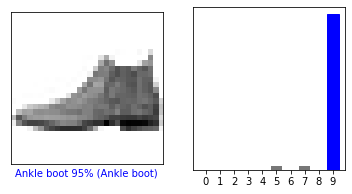

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


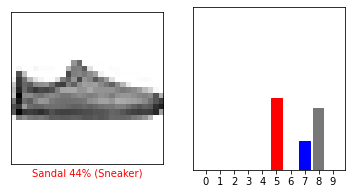

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


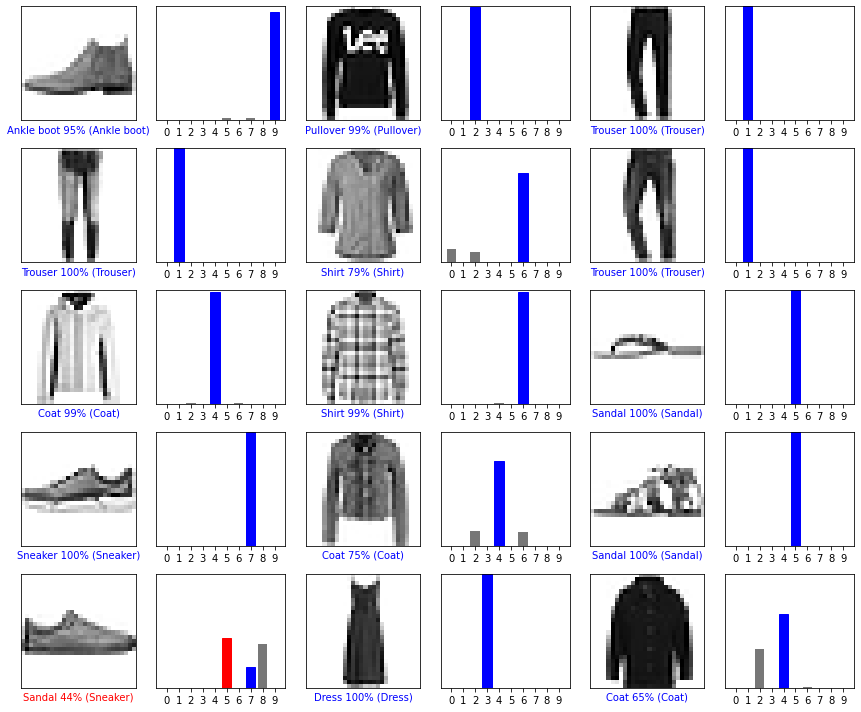

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[8.05115051e-05 1.14627977e-11 9.91596639e-01 1.55405544e-07
  8.19966779e-04 1.43903535e-11 7.50274444e-03 1.41242562e-17
  8.01967648e-09 1.12897213e-13]]


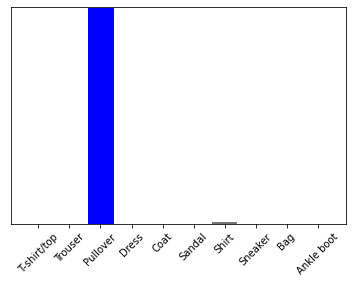

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [33]:
np.argmax(predictions_single[0])


2